# Random Forest Classifier for Gut Microbe Project
#### Author: Julie Huang ####
Input:
   1. Training samples (train_valid.csv)
   2. Test samples (XXXX.csv)
Model: 
   Random Forest
Output:
   A score on one test sample

In [443]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import imblearn
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
%matplotlib inline 
from sklearn.externals import joblib # pickle related 

In [403]:
train_gut = pd.read_csv('train_valid.csv')
#/Users/zybell/Dropbox/Insight_project/train_vaild.csv

In [444]:
### Use cross validation strategy, small size of the data
### Test data locked in a vault

X2 = train_gut[['SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10']].values
y = train_gut['Group'].values

## Build cross-validation iteration 
from sklearn import cross_validation, linear_model
cv = cross_validation.ShuffleSplit(len(y), n_iter=5,test_size=0.3)

In [445]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [459]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)
RF = rf.fit(X2, y) #model fitting

scores_RF = cross_validation.cross_val_score(RF,X2, y, cv=cv)
scores_RF.mean(), scores_RF.std()

(0.80000000000000004, 0.036140316116210026)

In [461]:
RF_score = rf.score(X2, y) #New

In [462]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [463]:
proba_X2_train = RF.predict_proba (X2)
proba_X2_train[:, 1]
#bin_X2_train
#bin_X2_train.transpose()
#bin_X2_train.transpose()[0]  #New
#len(bin_X2_train.transpose()[0])

array([ 0.22294792,  0.11814574,  0.30106859,  0.17442913,  0.2997165 ,
        0.15542859,  0.17938133,  0.09240094,  0.17501444,  0.32509572,
        0.41321261,  0.29850083,  0.17883154,  0.25604315,  0.17857484,
        0.12754911,  0.14928824,  0.10411105,  0.21749862,  0.14928824,
        0.11200539,  0.315642  ,  0.19327815,  0.1302691 ,  0.14928824,
        0.21644301,  0.17501444,  0.20078264,  0.22871432,  0.09890888,
        0.13714627,  0.21612903,  0.12754911,  0.1588854 ,  0.11200539,
        0.22252177,  0.16570527,  0.11200539,  0.2282047 ,  0.0697183 ,
        0.21897768,  0.39385965,  0.17169768,  0.32237568,  0.11814574,
        0.29736403,  0.11414007,  0.09026626,  0.12754911,  0.10928539,
        0.29557151,  0.10928539,  0.17501444,  0.19358473,  0.09026626,
        0.14630472,  0.17571301,  0.21462986,  0.09587635,  0.19055816,
        0.31331707,  0.20683195,  0.21342607,  0.07955345,  0.14744156,
        0.11200539,  0.14928824,  0.27695343,  0.1576422 ,  0.12

In [493]:
from sklearn.metrics import roc_curve, auc  ##Make roc curve ##  ##new##
#fpr, tpr, thresholds = metrics.roc_curve(y, proba_X2_train[:, 1]) ##roc##
fpr, tpr, thresholds = roc_curve(y, proba_X2_train[:, 1])
from sklearn.metrics import roc_auc_score ##roc auc##
roc_auc_score = roc_auc_score(y, proba_X2_train[:,1])
roc_auc_score

0.94382574516868656

In [465]:
tpr

array([ 0.06976744,  0.20930233,  0.27906977,  0.62790698,  0.6744186 ,
        0.76744186,  0.76744186,  0.79069767,  0.79069767,  0.81395349,
        0.81395349,  0.8372093 ,  0.8372093 ,  0.88372093,  0.88372093,
        0.90697674,  0.90697674,  0.93023256,  0.93023256,  0.95348837,
        0.95348837,  0.97674419,  0.97674419,  0.97674419,  0.97674419,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

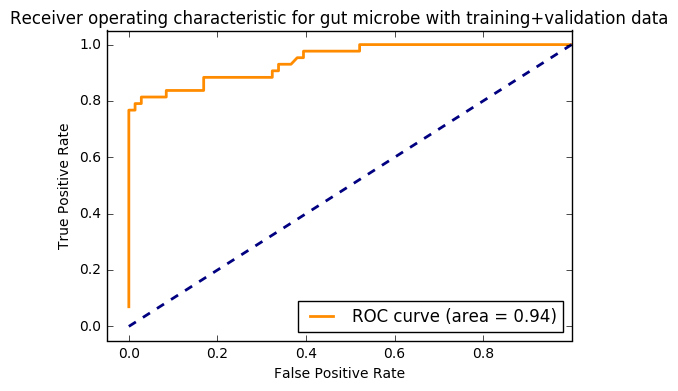

In [494]:
### In this part, I used the training + validation set for the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for gut microbe with training+validation data')
plt.legend(loc="lower right")
plt.show()

In [467]:
RF_score

0.90350877192982459

In [468]:
test_1 = pd.read_csv('test_1.csv')

In [469]:
Shermin = test_1[['SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10']].values
y_Shermin = test_1['Group'].values

In [470]:
Shermin

array([[  0.00000000e+00,   0.00000000e+00,   1.06000000e-05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.32066900e-02,   1.29329830e-02,   5.09617200e-03,
          2.80748000e-04]])

In [471]:
RF.predict (Shermin)

array([0])

In [472]:
RF.predict_proba (Shermin)

array([[ 0.72460789,  0.27539211]])

In [473]:
test_2 = pd.read_csv('test_2.csv')
Julie = test_2[['SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10']].values
y_Julie = test_2['Group'].values

In [474]:
y_Julie

array([1])

In [475]:
Julie

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.26537100e-03,   0.00000000e+00,
          1.21000000e-05,   0.00000000e+00,   0.00000000e+00,
          3.54000000e-05]])

In [476]:
RF.predict_proba (Julie)

array([[ 0.36502347,  0.63497653]])

In [477]:
bulk_test = pd.read_csv('gut_test.csv')
X2_bt = bulk_test[['SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10']].values
y_bt = bulk_test['Group'].values

In [478]:
RF.predict_proba(X2_bt) #predict for the bulk #print out probability

array([[ 0.72460789,  0.27539211],
       [ 0.77065836,  0.22934164],
       [ 0.82498556,  0.17501444],
       [ 0.82770556,  0.17229444],
       [ 0.92586278,  0.07413722],
       [ 0.83429473,  0.16570527],
       [ 0.80529612,  0.19470388],
       [ 0.88799461,  0.11200539],
       [ 0.86684079,  0.13315921],
       [ 0.55512864,  0.44487136],
       [ 0.80944184,  0.19055816],
       [ 0.86664534,  0.13335466],
       [ 0.60149917,  0.39850083],
       [ 0.92756171,  0.07243829],
       [ 0.81495481,  0.18504519],
       [ 0.94510087,  0.05489913],
       [ 0.60149917,  0.39850083],
       [ 0.67922979,  0.32077021],
       [ 0.36363636,  0.63636364],
       [ 0.36502347,  0.63497653],
       [ 0.39001132,  0.60998868],
       [ 0.18141026,  0.81858974],
       [ 0.31969697,  0.68030303],
       [ 0.72652198,  0.27347802],
       [ 0.64613022,  0.35386978],
       [ 0.68799301,  0.31200699],
       [ 0.72053892,  0.27946108]])

In [479]:
y_bt
###array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1#])###

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [480]:
RF.predict(X2_bt)
###array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1#])###

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0])

In [481]:
## Use X2_bt, the test data for ROC curve, and plot ROC curve
RF_predict_test = RF.predict_proba(X2_bt)[:,1]  #Proba prediction  
fpr_t, tpr_t, thresholds_t = roc_curve(y_bt, RF_predict_test)

from sklearn.metrics import roc_auc_score ##roc auc##
roc_auc_score_t = roc_auc_score(y_bt, RF_predict_test)
roc_auc_score_t

0.90588235294117636

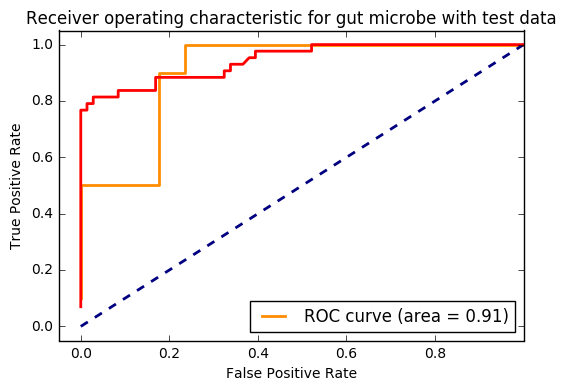

In [482]:
plt.figure()
lw = 2
plt.plot(fpr_t, tpr_t, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score_t)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr,tpr,color = 'red',lw=lw)  ## How to add roc_auc_score?
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for gut microbe with test data')
plt.legend(loc="lower right")
plt.show()

In [483]:
### This part of the code is to plot the ROC curve along with the Logistic Regression for comparison
### To have the parameters of LR, we still need to repeat the fit here
cv = cross_validation.ShuffleSplit(len(y), n_iter=5,test_size=0.3)
#LR= linear_model.LogisticRegression.fit(X2,y)
LR = linear_model.LogisticRegression()
lr = LR.fit(X2,y)
#lr.predict(X2)
LR_predict_test = lr.predict_proba(X2_bt)[:,1] 
LR_predict_test
#scores_lr = cross_validation.cross_val_score(LR,X2, y, cv=cv)
#scores_lr.mean(), scores_lr.std()
fpr_l, tpr_l, thresholds_l = roc_curve(y_bt, LR_predict_test)
roc_auc_score_l = roc_auc_score(y_bt, LR_predict_test)

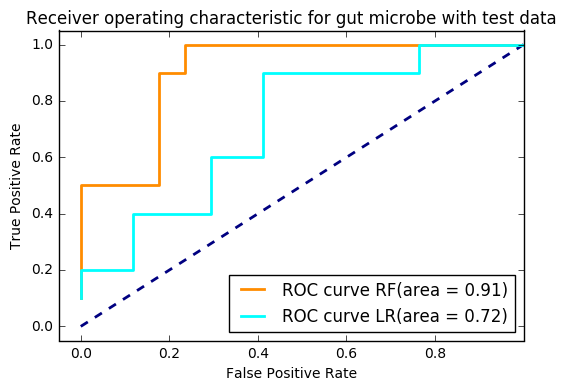

In [484]:
plt.figure()
lw = 2
plt.plot(fpr_t, tpr_t, color='darkorange',
         lw=lw, label='ROC curve RF(area = %0.2f)' % roc_auc_score_t)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr_l,tpr_l,color = 'cyan',
         lw=lw, label='ROC curve LR(area = %0.2f)' % roc_auc_score_l)  ## How to add roc_auc_score?
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for gut microbe with test data')
plt.legend(loc="lower right")
plt.show()

In [486]:
acc = (y_bt == RF.predict(X2_bt))
#RF.predict(X2_bt)
print np.mean(acc)
# 0.89

0.814814814815


In [487]:
## Pickle the final model for web app 

joblib.dump(RF, 'gut_app/fit_models/Random_Forest.pkl')  #pickle related

['gut_app/fit_models/Random_Forest.pkl',
 'gut_app/fit_models/Random_Forest.pkl_01.npy',
 'gut_app/fit_models/Random_Forest.pkl_02.npy',
 'gut_app/fit_models/Random_Forest.pkl_03.npy',
 'gut_app/fit_models/Random_Forest.pkl_04.npy',
 'gut_app/fit_models/Random_Forest.pkl_05.npy',
 'gut_app/fit_models/Random_Forest.pkl_06.npy',
 'gut_app/fit_models/Random_Forest.pkl_07.npy',
 'gut_app/fit_models/Random_Forest.pkl_08.npy',
 'gut_app/fit_models/Random_Forest.pkl_09.npy',
 'gut_app/fit_models/Random_Forest.pkl_10.npy',
 'gut_app/fit_models/Random_Forest.pkl_11.npy',
 'gut_app/fit_models/Random_Forest.pkl_12.npy',
 'gut_app/fit_models/Random_Forest.pkl_13.npy',
 'gut_app/fit_models/Random_Forest.pkl_14.npy',
 'gut_app/fit_models/Random_Forest.pkl_15.npy',
 'gut_app/fit_models/Random_Forest.pkl_16.npy',
 'gut_app/fit_models/Random_Forest.pkl_17.npy',
 'gut_app/fit_models/Random_Forest.pkl_18.npy',
 'gut_app/fit_models/Random_Forest.pkl_19.npy',
 'gut_app/fit_models/Random_Forest.pkl_20.npy',

In [488]:
###RF=joblib.load('gut_app/fit_models/Random_Forest.pkl')

In [490]:
### Here we test the recall score. Recall score is a good measurement of false negative rate

from sklearn import metrics
from sklearn.metrics import recall_score
#RF_recall = recall_score(y_bt, RF_predict_test) ##Recall for test data using RandomForest
#sklearn.metrics.recall_score(y_bt, RF_predict_test)
recall_score(y_bt, RF.predict(X2_bt))
#0.69

0.5

In [491]:
#recall_score(y_bt,lr.predict(X2_bt)) 
lr.predict(X2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])